<a href="https://colab.research.google.com/github/Rahmamouradsayed/Machine-learning-project-/blob/main/project_ML_Rahma_Mourad_202201407.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# Load the dataset
data = pd.read_csv('mhealth_raw_data.csv')

In [ ]:
data.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0.0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0.0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0.0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0.0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0.0,subject1


In [ ]:
data.describe()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,7859.000000,7859.000000,7859.000000,7859.000000,7858.000000,7858.000000,7858.000000,7858.000000,7858.000000,7858.000000,7858.000000,7858.000000,7858.000000
mean,2.004327,-9.544135,-0.051772,-0.148363,-0.853513,-0.588162,-3.780624,-5.777340,2.601412,-0.216591,-0.807645,-0.098900,0.152965
std,1.544649,2.066327,2.449761,0.153664,0.105850,0.134622,3.186295,5.191991,3.284004,0.373493,0.396583,0.450552,0.359977
min,-20.952000,-19.468000,-18.761000,-0.647500,-1.052500,-1.096300,-21.673000,-18.779000,-9.759200,-1.084300,-1.209400,-0.928880,0.000000
25%,1.692950,-9.696850,0.013534,-0.224490,-0.898690,-0.683690,-4.265850,-9.194500,1.175425,-0.509800,-1.045200,-0.357760,0.000000
50%,2.101200,-9.577000,0.396250,-0.200370,-0.872420,-0.540280,-2.999950,-8.934400,1.661900,-0.068627,-0.940450,-0.318970,0.000000
75%,2.427000,-9.455250,0.588250,-0.009276,-0.842400,-0.504910,-2.500250,-1.727875,3.257125,0.098039,-0.741270,0.005927,0.000000
max,19.944000,7.062300,23.470000,0.304270,0.030019,-0.058939,7.875800,11.320000,18.754000,0.613730,1.098600,1.144400,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7859 entries, 0 to 7858
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   alx       7859 non-null   float64
 1   aly       7859 non-null   float64
 2   alz       7859 non-null   float64
 3   glx       7859 non-null   float64
 4   gly       7858 non-null   float64
 5   glz       7858 non-null   float64
 6   arx       7858 non-null   float64
 7   ary       7858 non-null   float64
 8   arz       7858 non-null   float64
 9   grx       7858 non-null   float64
 10  gry       7858 non-null   float64
 11  grz       7858 non-null   float64
 12  Activity  7858 non-null   float64
 13  subject   7858 non-null   object 
dtypes: float64(13), object(1)
memory usage: 859.7+ KB


In [ ]:
data.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         1
glz         1
arx         1
ary         1
arz         1
grx         1
gry         1
grz         1
Activity    1
subject     1
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(7858, 14)

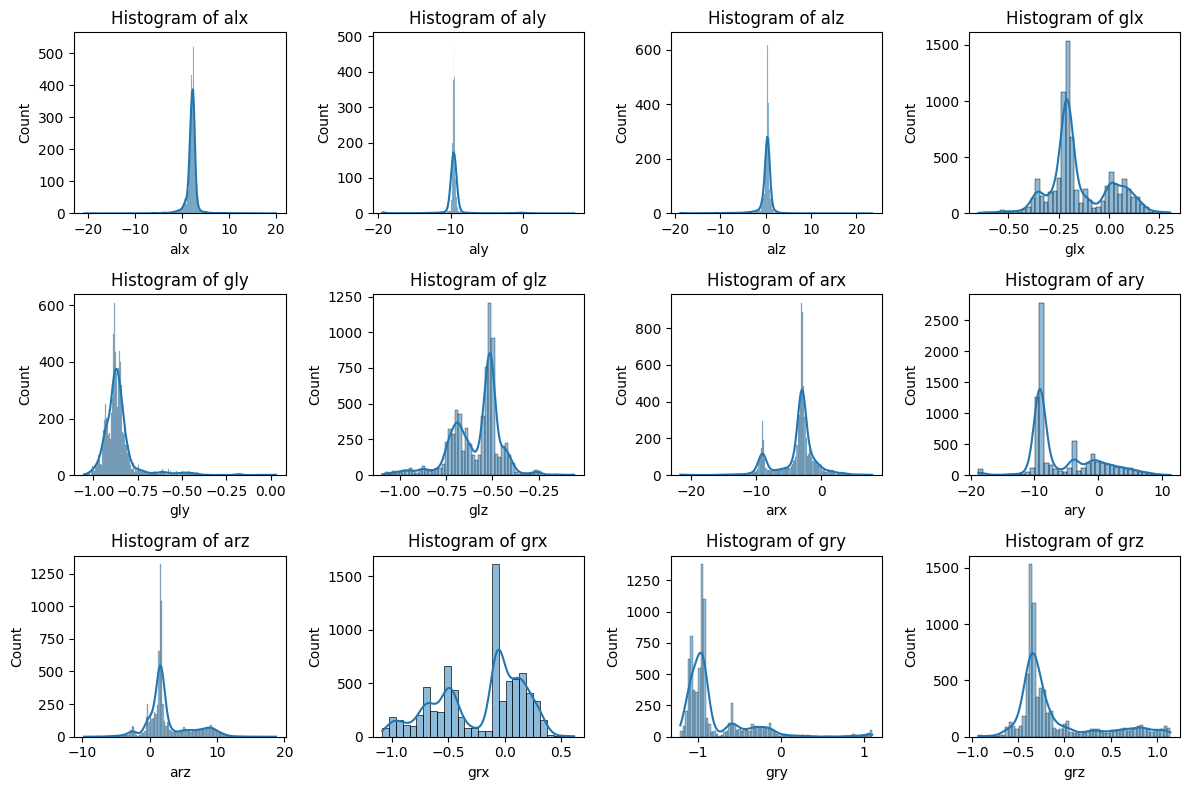

In [ ]:
# Draw histograms for each feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns[:-2]):  # Excluding 'Activity' and 'subject'
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

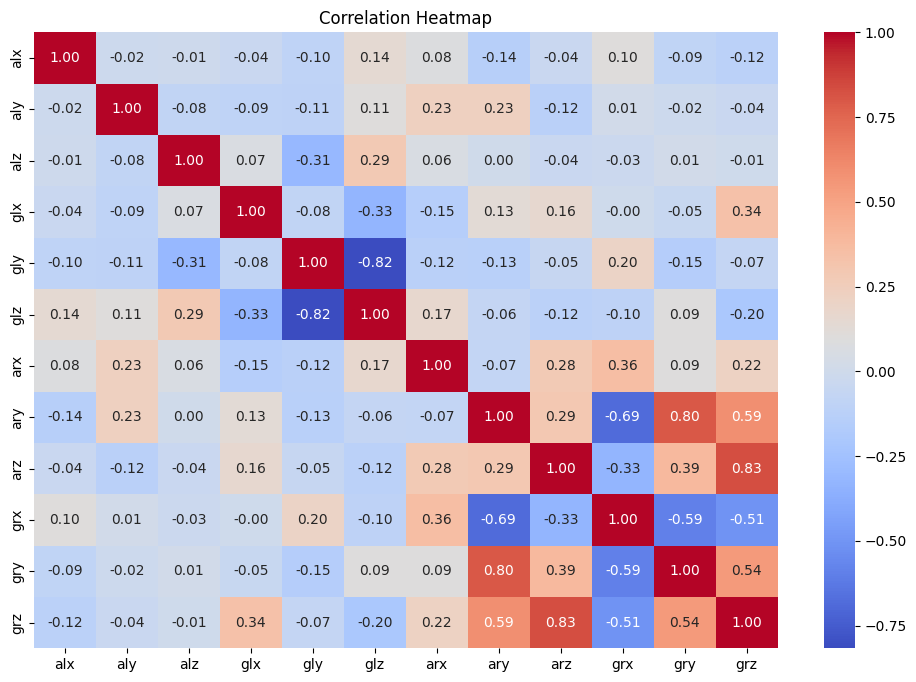

In [ ]:
# Exclude non-numeric columns
numeric_data = data.drop(columns=['Activity', 'subject'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

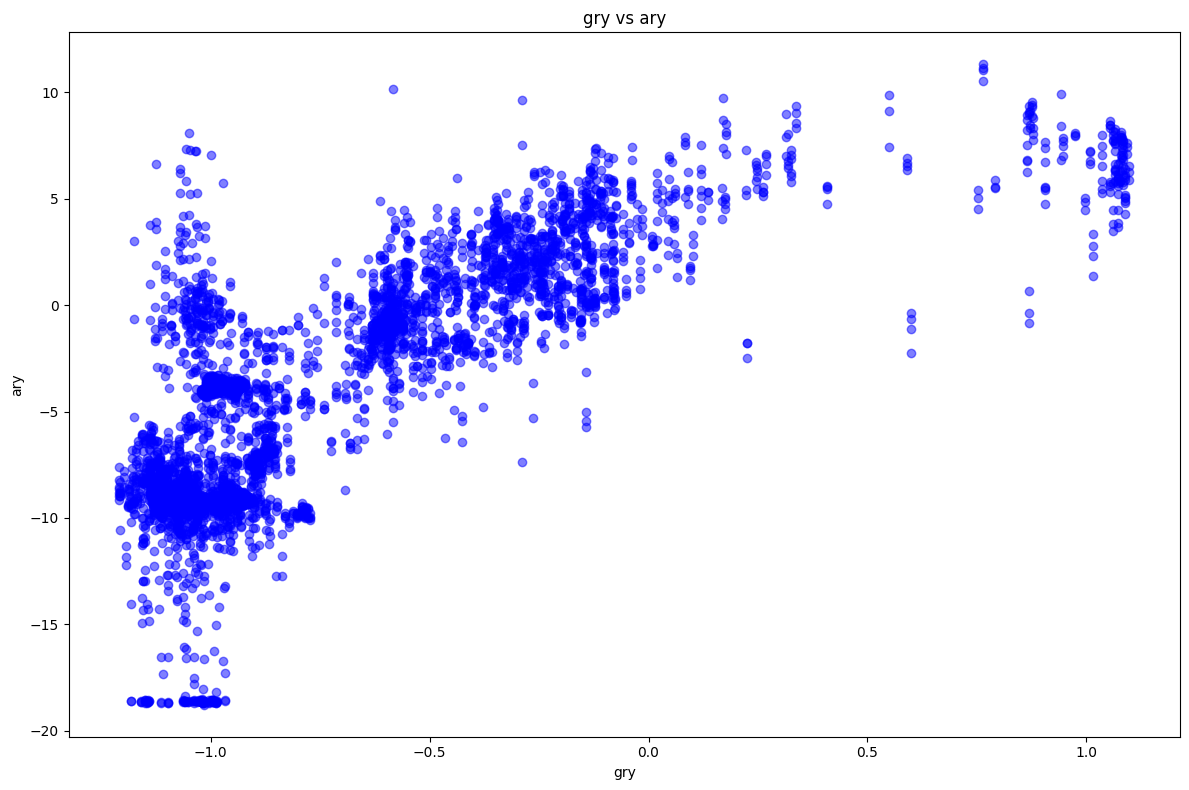

In [ ]:
# Select a subset of features for visualization
features = ['gry', 'ary']

# Plot the scatter plots for each pair of selected features
plt.figure(figsize=(12, 8))
for i in range(len(features)):
    for j in range(i+1, len(features)):
        plt.subplot(len(features)-1, len(features)-1, (i)*(len(features)-1)+j)
        plt.scatter(data[features[i]], data[features[j]], c='b', alpha=0.5)
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.title(f"{features[i]} vs {features[j]}")
plt.tight_layout()
plt.show()

In [ ]:
# Selecting a subset of the training data
subset_size = 0.3
data_subset = data.sample(frac=subset_size, random_state=42)

In [ ]:
# Splitting data into features and target
X = data_subset.drop(columns=["Activity", "subject"])
y = data_subset["Activity"]

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Model Training
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(max_iter=1000),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

In [ ]:
for name, model in models.items():
    if name == "Neural Network":
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)

In [ ]:
# Hyperparameter tuning for KNN and SVM
knn_params = {"n_neighbors": [3, 5, 7]}
svm_params = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf", "poly"]}
param_grids = {"KNN": knn_params, "SVM": svm_params}

In [ ]:
for name, model in models.items():
    if name in param_grids:
        grid = GridSearchCV(model, param_grids[name], cv=5)
        grid.fit(X_train, y_train)
        models[name] = grid.best_estimator_

In [ ]:
#Model Evaluation
evaluation_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    evaluation_results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1, "Confusion Matrix": conf_matrix}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [ ]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
y_pred_lr = linear_regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)

In [ ]:
# Add MSE to the evaluation results
evaluation_results["Linear Regression"] = {"MSE": mse}

In [ ]:
# Define number of folds for cross-validation
num_folds = 5

# Define cross-validation strategy
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation for each model
for model_name, model in models.items():
    print(f"Model: {model_name}")
    scores = cross_val_score(model, X, y, cv=kf)
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean CV Score: {np.mean(scores)}")
    print("---------------------------------------")

Model: KNN
Cross-Validation Scores: [0.95974576 0.95550847 0.93418259 0.96390658 0.95753715]
Mean CV Score: 0.9541761128504085
---------------------------------------
Model: SVM
Cross-Validation Scores: [0.83898305 0.87076271 0.8641189  0.84288747 0.84076433]
Mean CV Score: 0.8515032926697614
---------------------------------------
Model: Neural Network
Cross-Validation Scores: [0.95550847 0.95127119 0.95753715 0.95753715 0.95116773]
Mean CV Score: 0.9546043398467019
---------------------------------------
Model: Logistic Regression
Cross-Validation Scores: [0.81779661 0.85381356 0.84288747 0.82377919 0.81953291]
Mean CV Score: 0.8315619489726152
---------------------------------------


In [ ]:
# Step 4: Comparison of performance between different models
print("\nModel Evaluation Results:")
for name, result in evaluation_results.items():
    print(f"\n{name}:")
    for metric, value in result.items():
        print(f"{metric}: {value}")


Model Evaluation Results:

KNN:
Accuracy: 0.9597457627118644
Precision: 0.9626399870156972
Recall: 0.9597457627118644
F1-score: 0.9606395349540727
Confusion Matrix: [[382  14]
 [  5  71]]

SVM:
Accuracy: 0.8389830508474576
Precision: 0.7038925596093076
Recall: 0.8389830508474576
F1-score: 0.7655237053815512
Confusion Matrix: [[396   0]
 [ 76   0]]

Neural Network:
Accuracy: 0.6122881355932204
Precision: 0.8862312675871998
Recall: 0.6122881355932204
F1-score: 0.6599332800803531
Confusion Matrix: [[213 183]
 [  0  76]]

Logistic Regression:
Accuracy: 0.8177966101694916
Precision: 0.7009685230024214
Recall: 0.8177966101694916
F1-score: 0.7548891786179921
Confusion Matrix: [[386  10]
 [ 76   0]]

Linear Regression:
MSE: 0.11415663605856916
